In [1]:
# prerequisites
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
bs = 160

# MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5))])

train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transform, download=False)
train1 = datasets.MNIST(root='./mnist_data/', train=True, transform=transform, download=True)
train0 = datasets.MNIST(root='./mnist_data/', train=True, transform=transform, download=True)
train3 = datasets.MNIST(root='./mnist_data/', train=True, transform=transform, download=True)


# idx = (train_dataset.targets==1) | (train_dataset.targets==0)
# train_dataset.targets = train_dataset.targets[idx]
# train_dataset.data = train_dataset.data[idx]
idx = train_dataset.targets == 1
train1.targets = train_dataset.targets[idx]
train1.data = train_dataset.data[idx]

idx = train_dataset.targets == 0
train0.targets = train_dataset.targets[idx]
train0.data = train_dataset.data[idx]

idx = train_dataset.targets == 3
train3.targets = train_dataset.targets[idx]
train3.data = train_dataset.data[idx]
#take two datasets of 0's and 1's seperately . 
#create new #ther to training.
#


dataloader0 = torch.utils.data.DataLoader(dataset=train0, batch_size=50, drop_last=True, shuffle=True)
dataloader1 =  torch.utils.data.DataLoader(dataset=train1, batch_size=60, drop_last=True, shuffle=True)
dataloader3 =   torch.utils.data.DataLoader(dataset=train3, batch_size=50, drop_last=True, shuffle=True)

# # Example for class 0
# dataiter0 = iter(dataloader0)
# samples0 = next(dataiter0) 
# 
# def batch(dataiter, dataloader): 

# # Infinite dataloader 
  

#   try: 
#     features, labels = next(dataiter) 
#   except StopIteration:
#        # Thrown when dataset has been completely looped over 
#     dataiter = iter(dataloader) # Reinitialize data loader 
#     features, labels = next(dataiter) 
#   return features 
# # 
#i have to control [features, labels] numbers


# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=bs, drop_last=True, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=bs, shuffle=False)

In [3]:
i = train_dataset.targets == 0
train0.targets = train_dataset.targets[i]
train0.data = train_dataset.data[i]

In [3]:
torch.sum(train1.targets==1)

tensor(6742)

In [4]:
len(dataloader1)*60

6720

In [55]:
# dl = iter(d2)
# data = next(dl)

In [21]:
# dataiter0 = iter(dataloader0)
# samples0 = next(dataiter0) 

# def batch(dataiter, dataloader): 

# # Infinite dataloader 
  

#   try: 
#     features, labels = next(dataiter) 
#   except StopIteration:
#        # Thrown when dataset has been completely looped over 
#     dataiter = iter(dataloader) # Reinitialize data loader 
#     features, labels = next(dataiter) 
#   return features 

In [57]:
# class loaderfinal(torch.utils.data.Dataset):
#     def __init__(self, data,batch):
#         self.list=data
        
#     def __len__(self):
#         return self.batch
#     def __getitem__(self, idx):
#         if torch.is_tensor(idx):
#             idx = idx.tolist()
#         sample = new_images[idx]
#         if self.transform:
#             sample = self.transform(sample)
#         if (sample.float().size()[0] == 3):
#             return [sample.float(), self.labels[idx]]

torch.utils.data.dataloader.DataLoader

In [7]:
# def itr_merge(*itrs):
#     list = []
#     for itr in itrs:
#         for v in itr:
#             a = v

In [3]:
# dates = []
# for i, (x,_) in enumerate(train_loader):
#         # dates.append(x)
#         dates.append(x)

In [5]:
def customdata(d1,d2,d3):
    dataset = []
    tensor_data = []
    for i, ((x,_),(y,_),(q,_)) in enumerate(zip(d1,d2,d3)):
#         print(x.shape)
#         if i% 3 == 0 and i !=0:
#             a = dataset[-1]
#             b = dataset[-2]
#             c = dataset[-3]
            
        r = torch.cat((x,y,q),0)
        tensor_data.append(r)
        dataset.append(x)
        # print(len(dataset))
    return tensor_data
    

In [6]:
ds = customdata(dataloader0,dataloader1,dataloader3)

In [7]:
ds[-1].shape

torch.Size([160, 1, 28, 28])

In [8]:
class Generator(nn.Module):
    def __init__(self, g_input_dim, g_output_dim):
        super(Generator, self).__init__()       
        self.fc1 = nn.Linear(g_input_dim, 256)
        self.fc2 = nn.Linear(self.fc1.out_features, self.fc1.out_features*2)
        self.fc3 = nn.Linear(self.fc2.out_features, self.fc2.out_features*2)
        self.fc4 = nn.Linear(self.fc3.out_features, g_output_dim)
    
    # forward method
    def forward(self, x): 
        x = F.leaky_relu(self.fc1(x), 0.2)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = F.leaky_relu(self.fc3(x), 0.2)
        return torch.tanh(self.fc4(x))
    
class Discriminator(nn.Module):
    def __init__(self, d_input_dim):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(d_input_dim, 1024)
        self.fc2 = nn.Linear(self.fc1.out_features, self.fc1.out_features//2)
        # self.fc3 = nn.Linear(self.fc2.out_features, self.fc2.out_features//2)
        self.fc4 = nn.Linear(self.fc2.out_features, 1)
    
    # forward method
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), 0.2)
        x = F.dropout(x, 0.3)
        x = F.leaky_relu(self.fc2(x), 0.2)
        # x = F.dropout(x, 0.3)
        # x = F.leaky_relu(self.fc3(x), 0.2)
        x = F.dropout(x, 0.3)
        return torch.sigmoid(self.fc4(x))

In [9]:
# build network
z_dim = 100
mnist_dim = train_dataset.train_data.size(1) * train_dataset.train_data.size(2)

G = Generator(g_input_dim = z_dim, g_output_dim = mnist_dim).to(device)
D = Discriminator(mnist_dim).to(device)

/opt/conda/lib/python3.10/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [10]:
G

Generator(
  (fc1): Linear(in_features=100, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=1024, bias=True)
  (fc4): Linear(in_features=1024, out_features=784, bias=True)
)

In [11]:
D

Discriminator(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=1, bias=True)
)

In [12]:
# loss
criterion = nn.BCELoss() 

# optimizer
lr = 0.0002 
G_optimizer = optim.Adam(G.parameters(), lr = lr)
D_optimizer = optim.Adam(D.parameters(), lr = lr)

In [13]:
def D_train(x):
    #=======================Train the discriminator=======================#
    D.zero_grad()

    # train discriminator on real
    x_real, y_real = x.view(-1, mnist_dim), torch.ones(bs, 1)
    x_real, y_real = Variable(x_real.to(device)), Variable(y_real.to(device))

    D_output = D(x_real)
    D_real_loss = criterion(D_output, y_real)
    D_real_score = D_output

    # train discriminator on fake
    z = Variable(torch.randn(bs, z_dim).to(device))
    x_fake, y_fake = G(z), Variable(torch.zeros(bs, 1).to(device))

    D_output = D(x_fake)
    D_fake_loss = criterion(D_output, y_fake)
    D_fake_score = D_output

    # gradient backprop & optimize ONLY D's parameters
    D_loss = D_real_loss + D_fake_loss
    D_loss.backward()
    D_optimizer.step()
        
    return  D_loss.data.item()

In [14]:
def G_train(x):
    #=======================Train the generator=======================#
    G.zero_grad()

    z = Variable(torch.randn(bs, z_dim).to(device))
    y = Variable(torch.ones(bs, 1).to(device))

    G_output = G(z)
    D_output = D(G_output)
    G_loss = criterion(D_output, y)

    # gradient backprop & optimize ONLY G's parameters
    G_loss.backward()
    G_optimizer.step()
        
    return G_loss.data.item()

In [15]:
n_epoch = 200
for epoch in range(1, n_epoch+1):           
    D_losses, G_losses = [], []
    for batch_idx, x in enumerate(ds):
        D_losses.append(D_train(x))
        G_losses.append(G_train(x))
        if batch_idx ==99:
            # fake_images = G(z)
            break
        

    print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
            (epoch), n_epoch, torch.mean(torch.FloatTensor(D_losses)), torch.mean(torch.FloatTensor(G_losses))))

[1/200]: loss_d: 0.897, loss_g: 1.516
[2/200]: loss_d: 0.685, loss_g: 3.536
[3/200]: loss_d: 0.970, loss_g: 3.752
[4/200]: loss_d: 0.098, loss_g: 5.386
[5/200]: loss_d: 0.953, loss_g: 5.195
[6/200]: loss_d: 0.227, loss_g: 5.663
[7/200]: loss_d: 0.576, loss_g: 3.896
[8/200]: loss_d: 0.650, loss_g: 3.440
[9/200]: loss_d: 0.516, loss_g: 4.028
[10/200]: loss_d: 0.715, loss_g: 3.381
[11/200]: loss_d: 1.040, loss_g: 2.382
[12/200]: loss_d: 0.824, loss_g: 2.615
[13/200]: loss_d: 0.948, loss_g: 2.126
[14/200]: loss_d: 0.931, loss_g: 2.869
[15/200]: loss_d: 0.928, loss_g: 2.196
[16/200]: loss_d: 0.811, loss_g: 1.910
[17/200]: loss_d: 0.667, loss_g: 2.723
[18/200]: loss_d: 0.664, loss_g: 2.221
[19/200]: loss_d: 0.758, loss_g: 1.834
[20/200]: loss_d: 0.543, loss_g: 2.728
[21/200]: loss_d: 0.489, loss_g: 3.018
[22/200]: loss_d: 0.442, loss_g: 3.253
[23/200]: loss_d: 0.314, loss_g: 3.642
[24/200]: loss_d: 0.319, loss_g: 4.046
[25/200]: loss_d: 0.525, loss_g: 4.678
[26/200]: loss_d: 0.660, loss_g: 3

In [16]:
with torch.no_grad():
    test_z = Variable(torch.randn(bs, z_dim).to(device))
    generated = G(test_z).detach().cpu()

    save_image(generated.view(generated.size(0), 1, 28, 28), './tsampleu303123_' + '.jpg')
    # for i in len
    # save_image(fake[i], os.path.join(sample_dir, fake_fname), nrow=1)
    

In [37]:
import os

sample_dir = 'samples'
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)


In [38]:
import matplotlib.pyplot as plt


In [18]:
generated = generated.reshape(160,28,28,1)

In [35]:
generated.shape

torch.Size([160, 28, 28, 1])

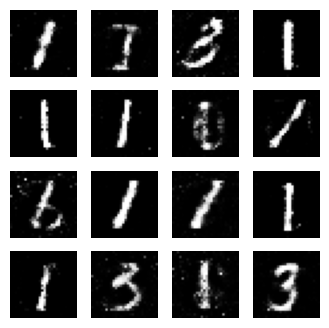

In [103]:
predictions = G(test_z).detach().cpu()

predictions = predictions.reshape(160,28,28,1)
fig = plt.figure(figsize=(4, 4))
for i in range(predictions.shape[0]):
    if i < 16:
        plt.subplot(4, 4, i+1)
    plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
    plt.imsave('samples01/image{:04d}-{}.png'.format(1, i), predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
    
    plt.axis('off')

# plt.savefig('image_at_epoch_{:04d}.png'.format(303))
plt.show()

In [ ]:
predictions.shape[0]

gen_images= torch.chunk(predictions,160,dim=0)
for i in range(len(gen_images)):
    print(gen_images[i].shape)

In [126]:
gen_images = list(gen_images)

In [128]:
type(gen_images[0])

torch.Tensor

#Performing Classification of the Generated Images 

In [20]:
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization

In [21]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [22]:
loss_func = nn.CrossEntropyLoss()   
loss_func

CrossEntropyLoss()

In [23]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [24]:
def itr_merge(*itrs):
    list = []
    for itr in itrs:
        for v in itr:
            return v

In [25]:
# dataset = ConcatDataset(train1,train0, train3)
trainset = torch.utils.data.ConcatDataset([train1,train0, train3])

In [26]:
len(trainset)

18796

In [27]:
classifer_loader = torch.utils.data.DataLoader(dataset=trainset, batch_size=50, drop_last=True, shuffle=True)

In [29]:
from torch.autograd import Variable
num_epochs = 3
def train(num_epochs, cnn, loaders):
    cnn.train()
        
    # Train the model
    total_step = len(loaders)
        
    for epoch in range(num_epochs):
        
        for i, (images, labels) in enumerate(loaders):
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]               
            loss = loss_func(output, b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                pass
            pass
        pass
train(num_epochs, cnn, classifer_loader)

Epoch [1/3], Step [100/375], Loss: 0.0000
Epoch [1/3], Step [200/375], Loss: 0.0001
Epoch [1/3], Step [300/375], Loss: 0.0002
Epoch [2/3], Step [100/375], Loss: 0.0000
Epoch [2/3], Step [200/375], Loss: 0.1287
Epoch [2/3], Step [300/375], Loss: 0.0000
Epoch [3/3], Step [100/375], Loss: 0.0000
Epoch [3/3], Step [200/375], Loss: 0.0000
Epoch [3/3], Step [300/375], Loss: 0.0000


In [34]:
torch.save(cnn.state_dict(), 'Classifier')
torch.save(cnn, 'ClassifierMNIST/cnn.pth')

In [ ]:
cnn.eval()
with torch.no_grad()

In [36]:
generated = generated.reshape(160,1,28,28)

In [37]:
cnn.eval()
with torch.no_grad():
    test_output, last_layer = cnn(generated)
    pred_y = torch.max(test_output, 1)[1].data.squeeze()

In [ ]:
# cnn.eval()
# with torch.no_grad():
    
#     correct = 0
#     total = 0
#     for images in gen_images:
        
#         test_output, last_layer = cnn(images)
#         pred_y = torch.max(test_output, 1)[1].data.squeeze()
#         # accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
#         pass
# print(pred_y)    
# # print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)

In [38]:
len(pred_y)

160

In [39]:
gen_c1 = 0
gen_c0 =0
gen_c3 = 0
for i in pred_y:
    if i == 0:
        gen_c0 += 1
    if i == 1:
        gen_c1 += 1
    if i ==3:
        gen_c3 +=1
        
        
        

In [40]:
print(gen_c0, gen_c1, gen_c3)

31 77 52
